#### Lecture 2 - Analytical vs Numerical Models
Parachute problem from Chapra & Canale Chapter 1:
$$\frac{dv}{dt} = g - \frac{cv}{m}$$

Given $m = 68.1$ kg, $c = 12.5$ kg/s, and $g = 9.81$ m/s$^2$

Initial condition $v(0) = 0$ m/s

Solve for $v(t)$ for $t \in [0, 20]$ s using a timestep $\Delta t = 2$ s. Compare to analytical solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

m  = 68.1 # kg     
c  = 12.5 # kg/s
g  = 9.81 # m/s^2
v0 = 0 # m/s

tf = 20 # s
dt = 2 # s

# Set up vectors for time and velocity
t = np.arange(0, tf+dt, dt)  # t=0 to t=tf in steps of dt
v = np.zeros(len(t)) # empty, we will fill in values

# Loop up to T-1. Euler's method
v[0] = v0  # set initial condition (index 0)                    
for i in range(len(t)-1):
    v[i+1] = v[i] + dt * (g - (c/m) * v[i]) 

In [2]:
# Analytical solution
ta = np.arange(0, tf, 0.01)
va = (g*m/c) * (1 - np.exp(-c * ta/m))    

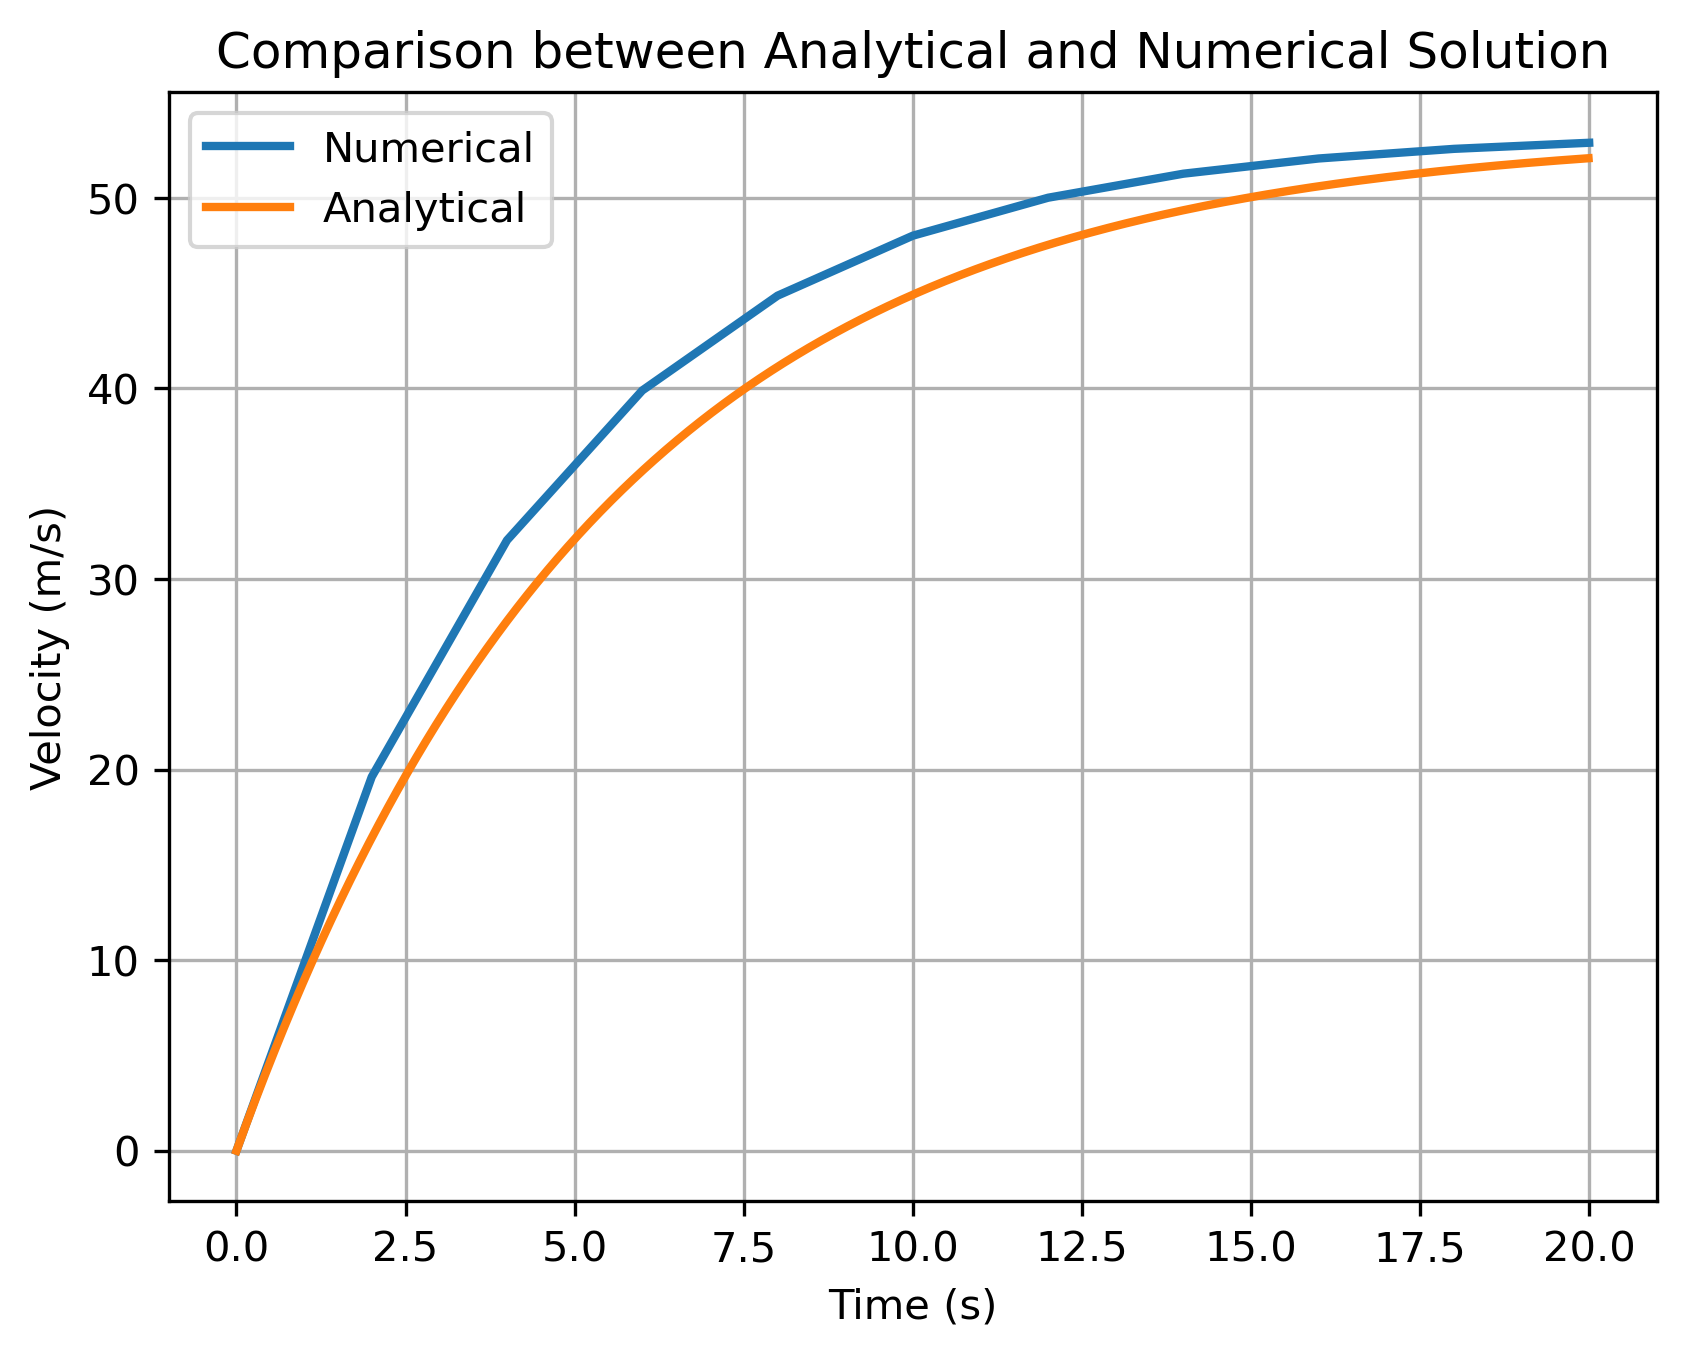

In [3]:
# Plot
plt.plot(t, v, lw = 2, label='Numerical') # lw is linewidth
plt.plot(ta, va, lw = 2,label='Analytical')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.title('Comparison between Analytical and Numerical Solution')
plt.legend()
plt.show()

#### Questions:
- Approaches terminal velocity? $mg/c \approx 53.4$ m/s
- How does step size affect error? Try $\Delta t = 0.2$ s
- Solve for displacement $y(t)$?

In [4]:
# terminal velocity
print(m*g/c)

53.44487999999999


In [5]:
# solve for displacement
y = np.zeros(len(t))
y[0] = 0 # initial condition
for i in range(len(t)-1):
    y[i+1] = y[i] - dt * v[i] # solved for v above

In [6]:
# analytical solution from calculus 
ya = -(g*m/c)*ta + (g*m**2/c**2)*(1 - np.exp(-c*ta/m))

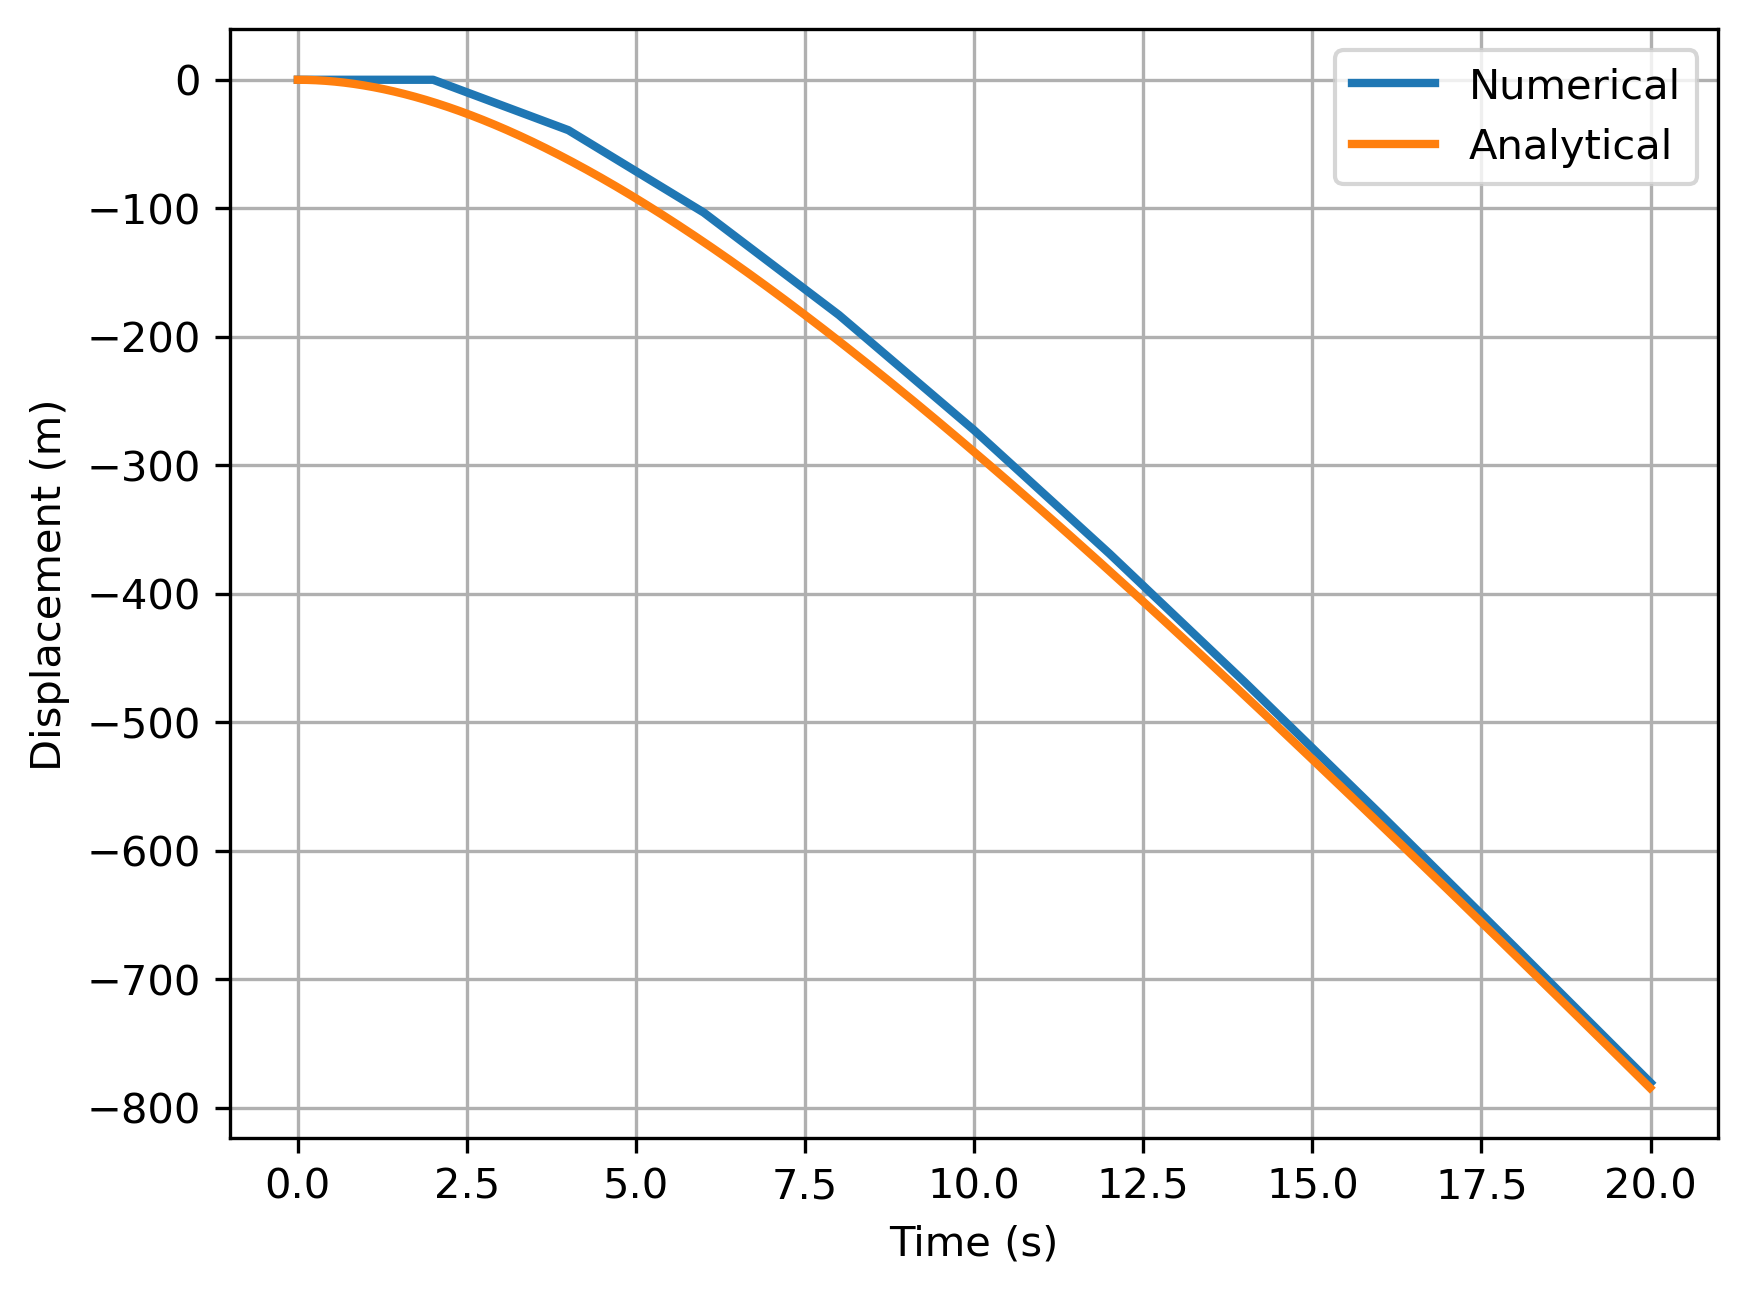

In [7]:
plt.plot(t, y, lw = 2, label='Numerical')
plt.plot(ta, ya, lw = 2, label='Analytical')
plt.xlabel('Time (s)');
plt.ylabel('Displacement (m)');
plt.grid(True)
plt.legend()
plt.show()

#### Extra problem - C&C 1.9
A cylindrical storage tank contains water at depth $y$, where $y=0$ when the tank is half full. Water is withdrawn at constant rate $Q$ and refilled at a rate $Q_{in} = 3Q\sin^2(t)$.

Given $A = 1250$ m$^2$, $Q = 450$ m$^3$/d, and $y(0) = 0$


Use Euler's method to solve for $y(t)$ for $t \in [0,10]$ d using $\Delta t = 0.5$ d.

The differential equation comes from mass balance:
$$\frac{dV}{dt} = Q_{in} - Q_{out}$$

The cylinder has a constant area:
$$\frac{dy}{dt} = \frac{Q_{in}}{A} - \frac{Q_{out}}{A} = \frac{3Q_{out}\sin^2(t)}{A} - \frac{Q_{out}}{A}$$

In [8]:
# clear variables to start a new problem
%reset -f

import numpy as np
import matplotlib.pyplot as plt

Q = 450.0 # m^3/day
A = 1250.0 # m^2
dt = 0.1 # day
t = np.arange(0,10+dt,dt) # day

y    = np.zeros(len(t))  # depth (empty, to be filled in)

# in this case, the derivative does not depend on y
# so we can calculate it before the loop
dydt = 3 * (Q/A) * np.sin(t)**2 - (Q/A)

for i in range(len(t)-1):
    y[i+1] = y[i] + dt * dydt[i] # Euler's method

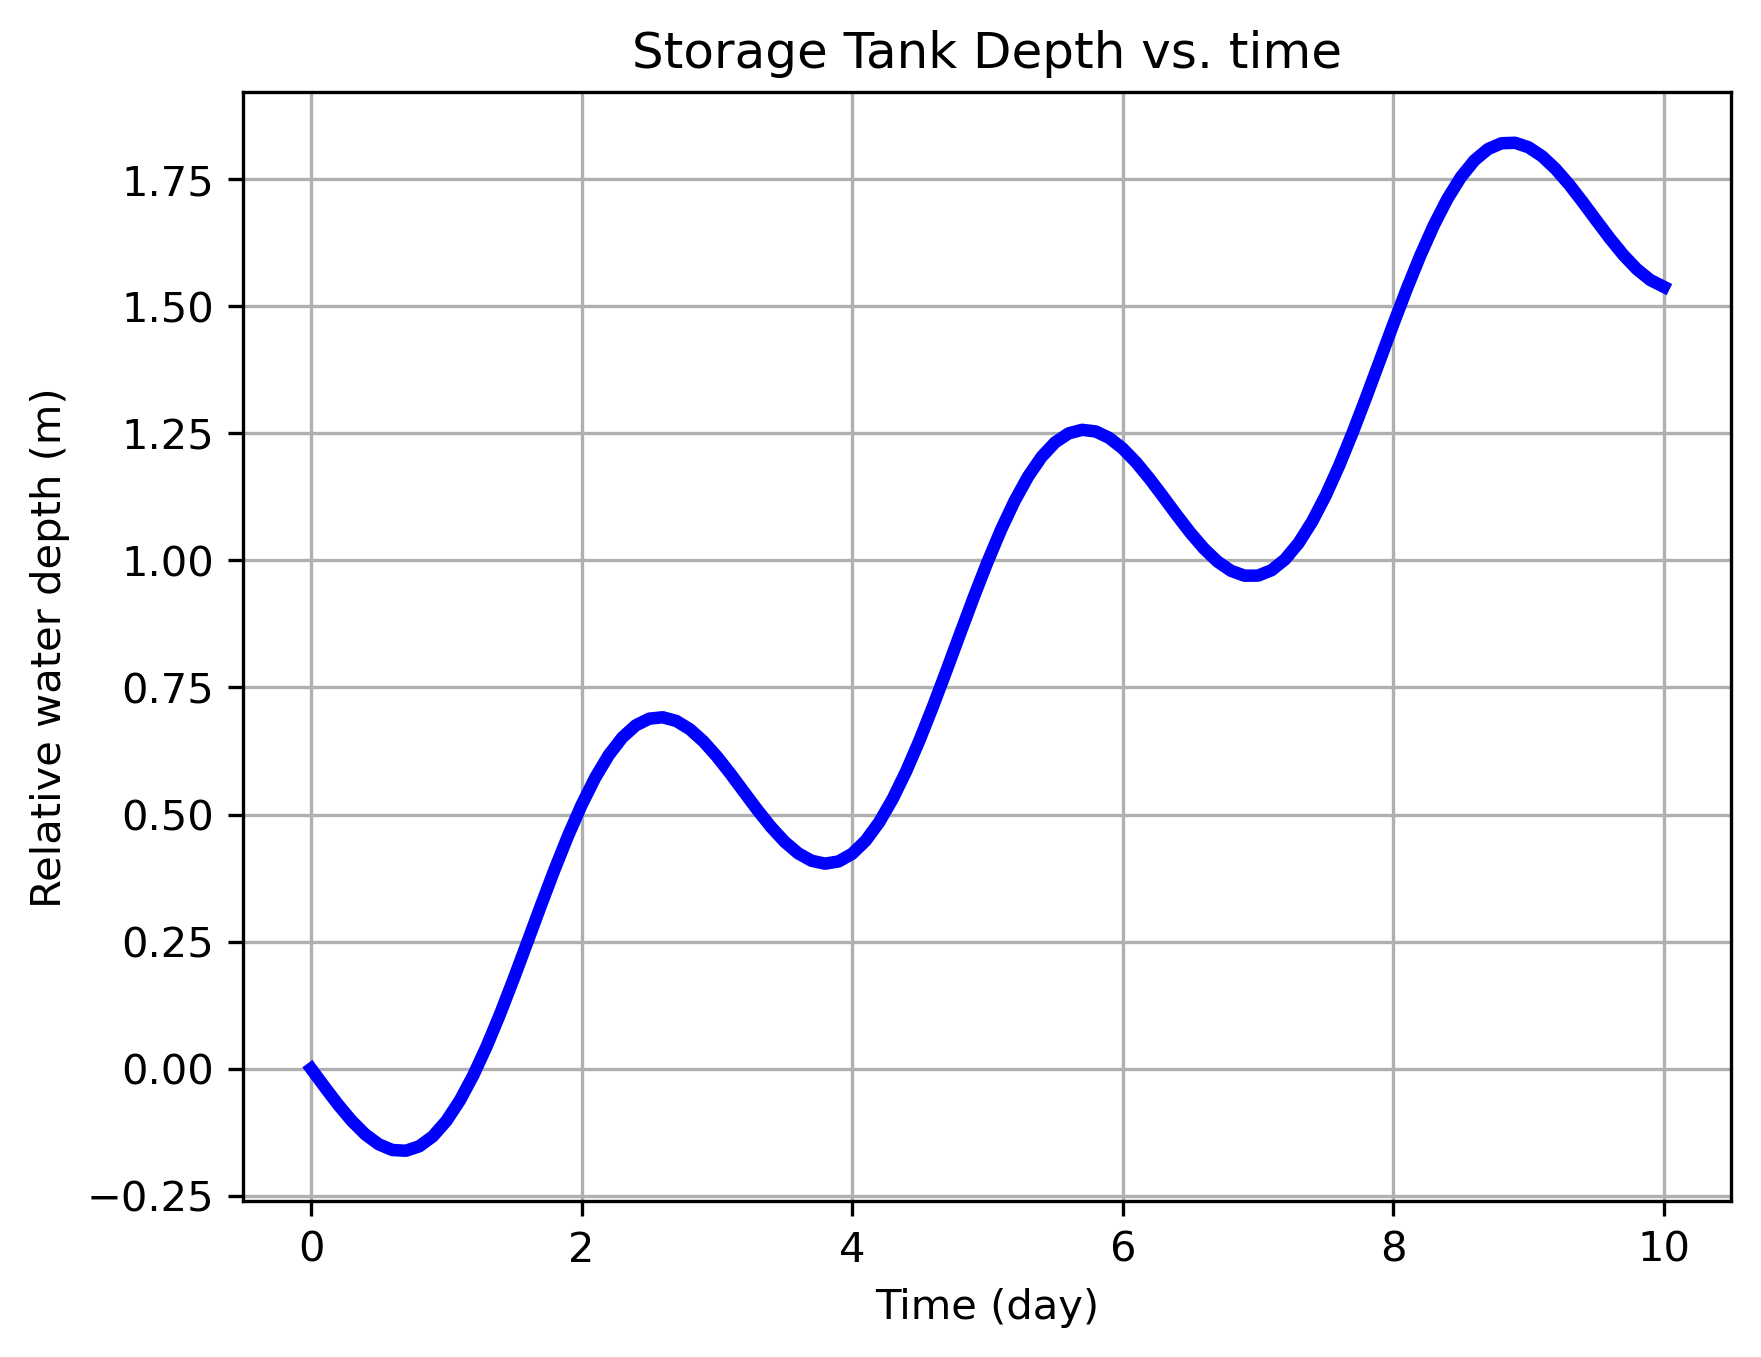

In [9]:
plt.plot(t, y, '-b', lw = 3)
plt.xlabel('Time (day)')
plt.ylabel('Relative water depth (m)')
plt.title('Storage Tank Depth vs. time')
plt.grid(True)
plt.show()